## Use decision trees to prepare a model on fraud data 
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
We build two models, one with criterion `gini index` and another one with criterion `entropy`. 

In [5]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing dataset using pandas
data=pd.read_csv('Fraud_check.csv')

## Performing EDA

In [7]:
#displaying  first 5 records 
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
#displaying last 5 records
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [9]:
#shape of dataset
data.shape   

(600, 6)

Dataset has 600 rows and 6 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


As we can see that from the infomation the dataset having int and object datatypes.But while using decision tree algorithm it will only allows categorical data.So, in our case we have target class is Taxable.Income .So, we are going to convert it into categorical type.

In [11]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [12]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [13]:
col_names=['Undergrad', 'Marital.Status','Urban']

for col in col_names:
    
    print(data[col].value_counts())  
    

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


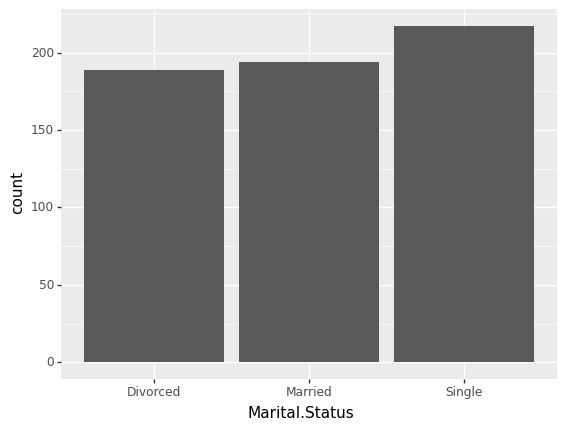

<ggplot: (135707135979)>

In [14]:
#displaying data by bar chart using ggplot
import plotnine as p9
(p9.ggplot(data=data,
           mapping=p9.aes(x='Marital.Status'))
    + p9.geom_bar()
)

The ratio of singles as high than the others

In [15]:
#renaming the columns
data=data.rename({'Marital.Status':'Marital_S','Taxable.Income':'Tax_Inc',
                  'City.Population':'Pop','Work.Experience':'Exp'},axis=1)

In [16]:
data.head()

,Undergrad,Marital_S,Tax_Inc,Pop,Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [17]:
conditions = [(data['Tax_Inc'] <= 30000),(data['Tax_Inc'] > 30000)]
choices = ['Risky','Good']

# create a new column or assign it to an existing
# the last param in np.select is default
data['Tax_Inc'] = np.select(conditions, choices)

In [18]:
data.head(15)

,Undergrad,Marital_S,Tax_Inc,Pop,Exp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


In [19]:
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Undergrad','Urban'],drop_first=True)

The get_dummies function is used to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.

In [20]:
#converting data object to integer
data['Marital_S']=data['Marital_S'].map({'Single':1,'Married':2,'Divorced':3})
data['Tax_Inc']=data['Tax_Inc'].map({'Risky':1,'Good':0})

map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [21]:
data.head(15)

,Marital_S,Tax_Inc,Pop,Exp,Undergrad_YES,Urban_YES
0,1,0,50047,10,0,1
1,3,0,134075,18,1,1
2,2,0,160205,30,0,1
3,1,0,193264,15,1,1
4,2,0,27533,28,0,0
5,3,0,116382,0,0,0
6,3,0,80890,8,0,1
7,1,0,131253,3,1,1
8,1,0,102481,12,0,1
9,3,0,155482,4,1,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Marital_S      600 non-null    int64
 1   Tax_Inc        600 non-null    int64
 2   Pop            600 non-null    int64
 3   Exp            600 non-null    int64
 4   Undergrad_YES  600 non-null    uint8
 5   Urban_YES      600 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 20.0 KB


In [23]:
#checking for NA values
data.isna().sum()

Marital_S        0
Tax_Inc          0
Pop              0
Exp              0
Undergrad_YES    0
Urban_YES        0
dtype: int64

the dataset having no any NA values

In [24]:
#checking for duplicated values
data[data.duplicated()].shape

(0, 6)

No any record has been duplicated

In [25]:
data.columns

Index(['Marital_S', 'Tax_Inc', 'Pop', 'Exp', 'Undergrad_YES', 'Urban_YES'], dtype='object')

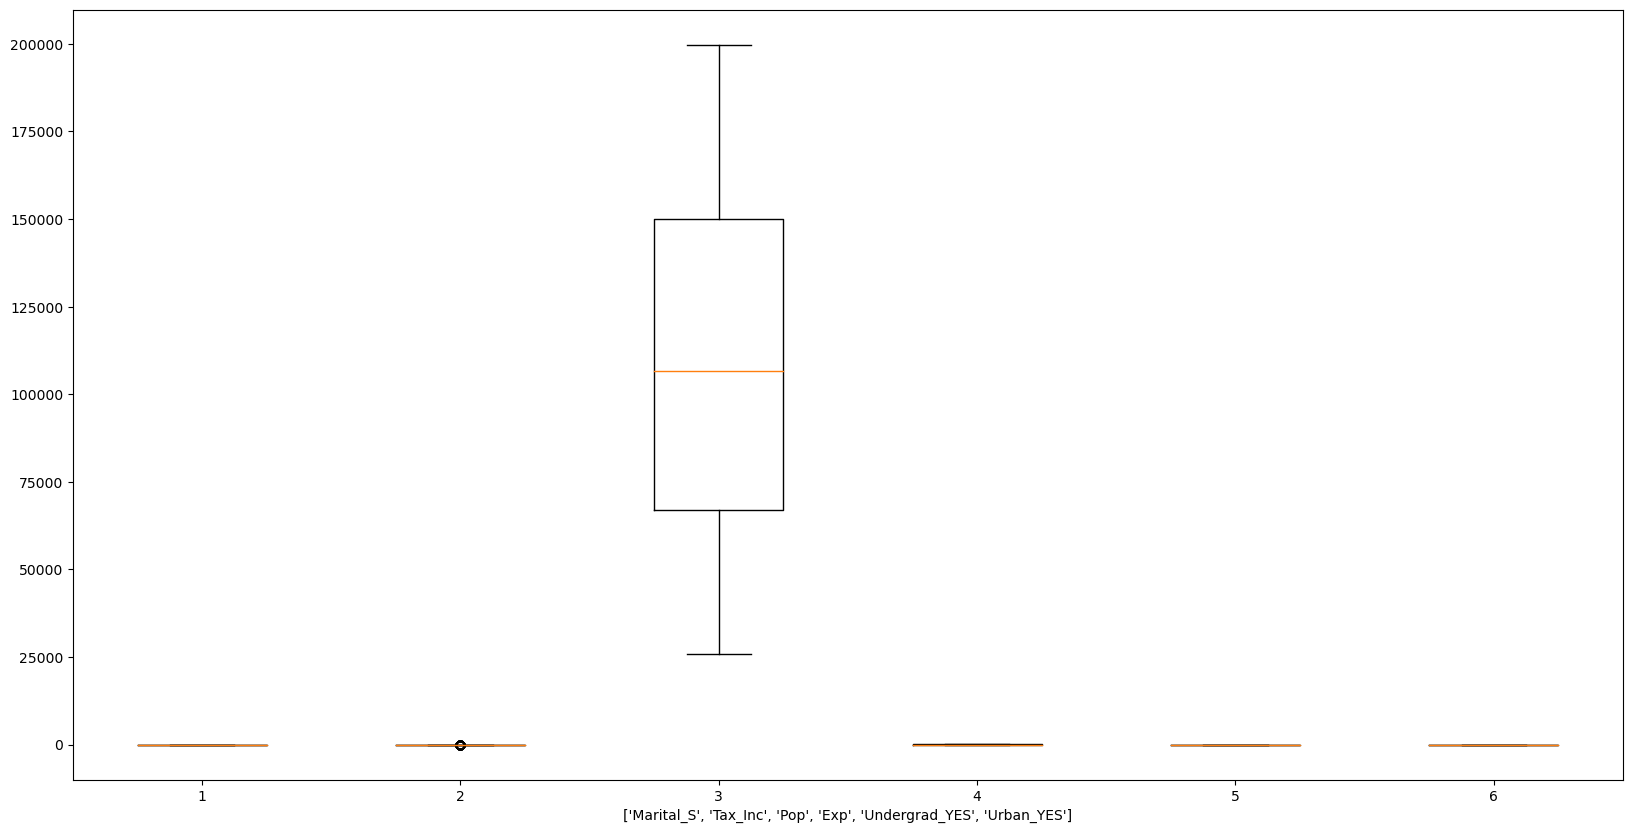

In [26]:
#detecting outlier's 
col_n=['Marital_S', 'Tax_Inc', 'Pop', 'Exp', 'Undergrad_YES', 'Urban_YES']
plt.figure(figsize=(20,10))
plt.boxplot(data)
plt.xlabel(col_n)
plt.show()

Only Tax_Inc contains outlier 

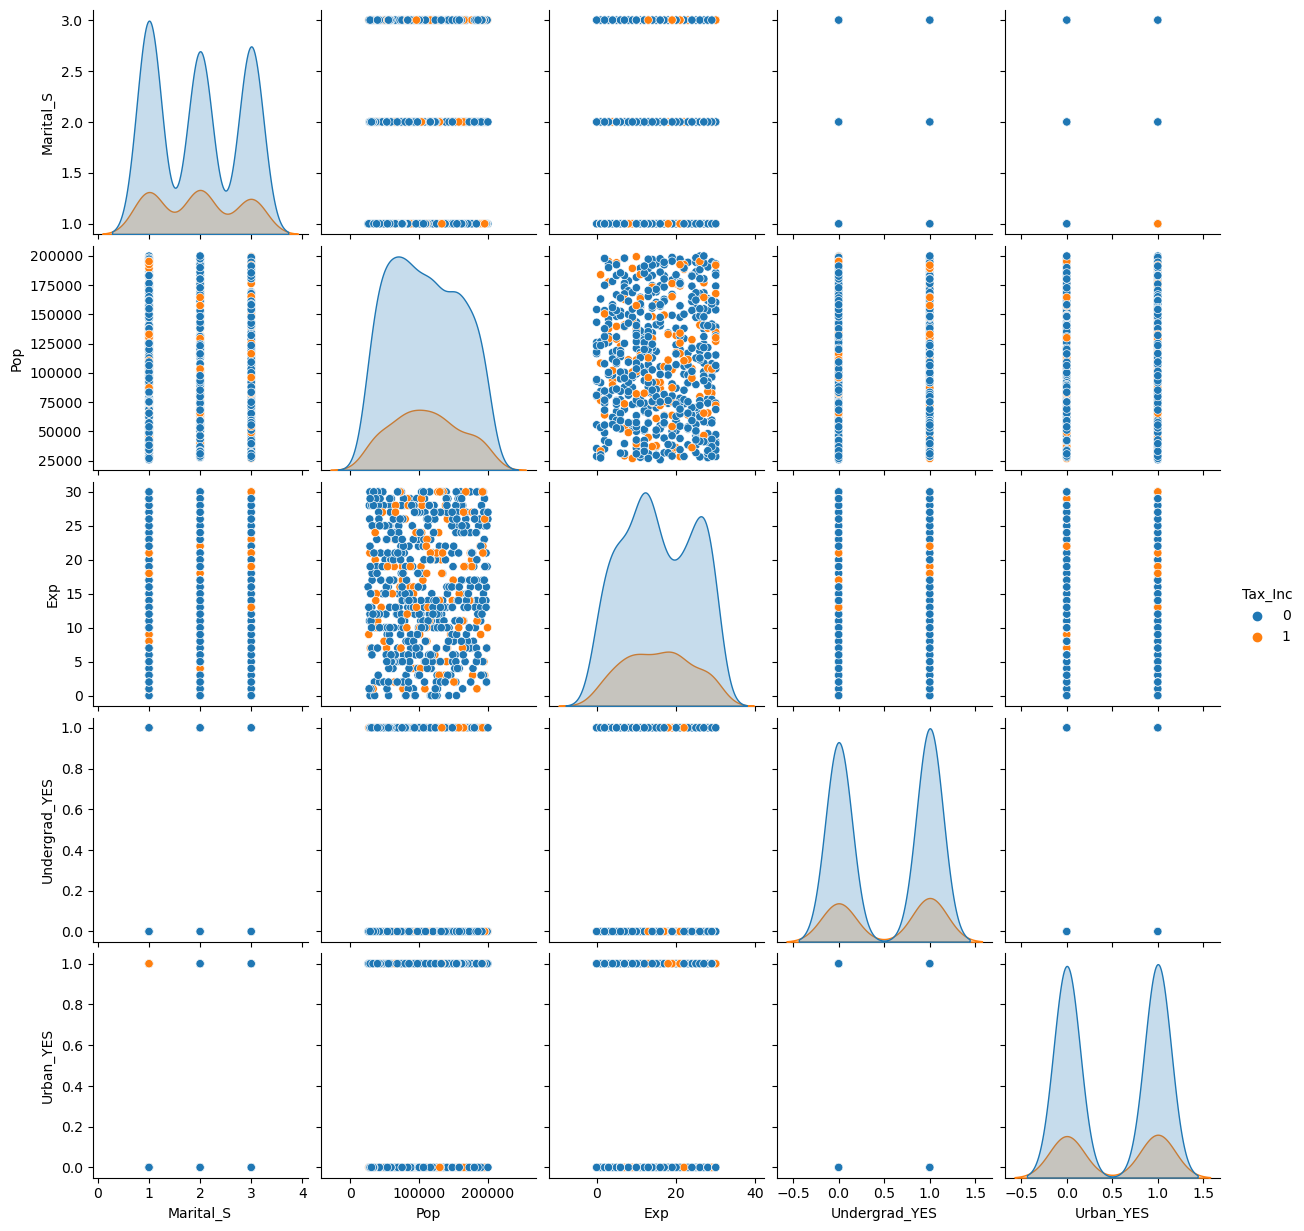

In [27]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'Tax_Inc')
plt.show()

The above data is skewed so we can't make any conclusions from it

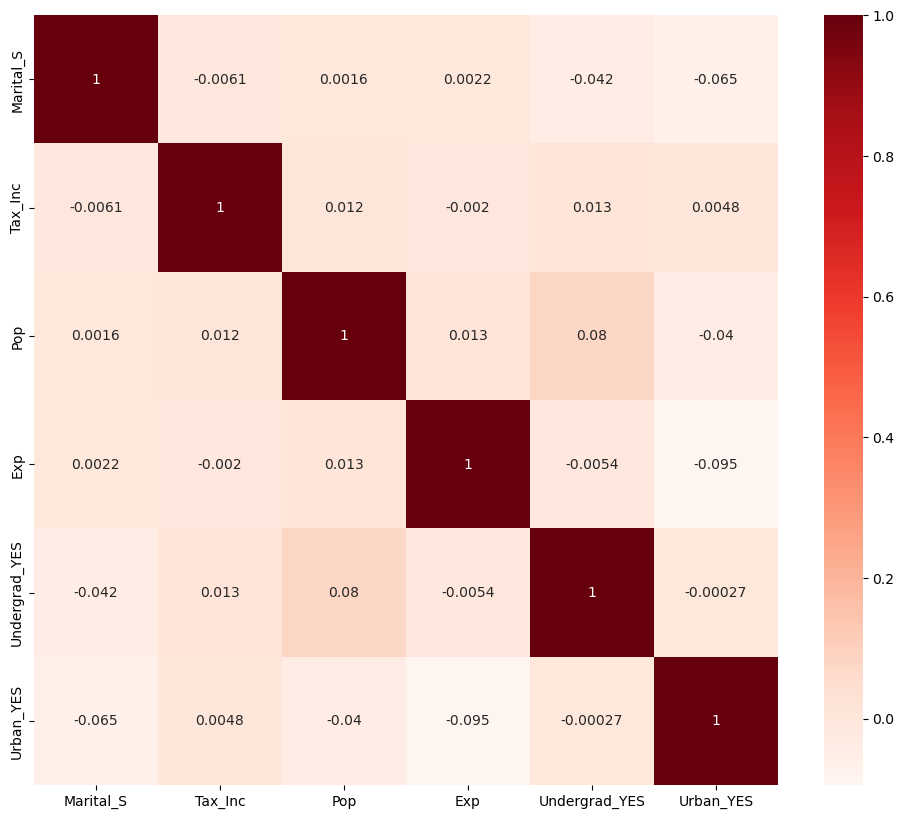

In [28]:
#checking corelation 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Declaring feature vector and target variable

In [29]:
X=data.drop(['Tax_Inc'],axis=1) #feature vectors
Y=data['Tax_Inc']  #target variable

In [30]:
X.head()

,Marital_S,Pop,Exp,Undergrad_YES,Urban_YES
0,1,50047,10,0,1
1,3,134075,18,1,1
2,2,160205,30,0,1
3,1,193264,15,1,1
4,2,27533,28,0,0


In [31]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Inc, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [33]:
# checking the shape of X_train and X_test

x_train.shape, x_test.shape

((480, 5), (120, 5))

## Building Decision Tree Classifier using Entropy Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [35]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=40)

In [36]:
#fitting the model
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)

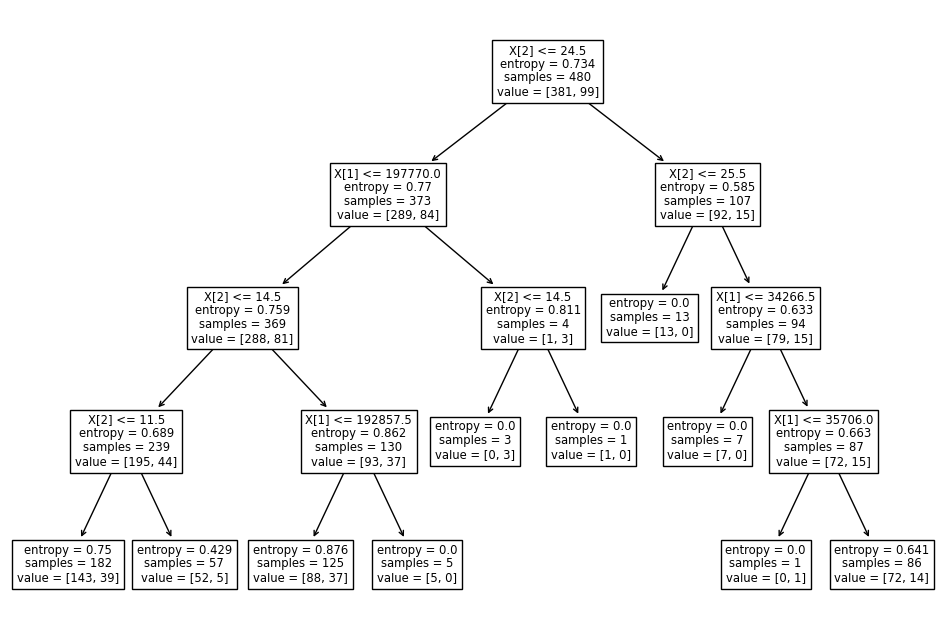

In [37]:
#PLotting the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en)
plt.show()

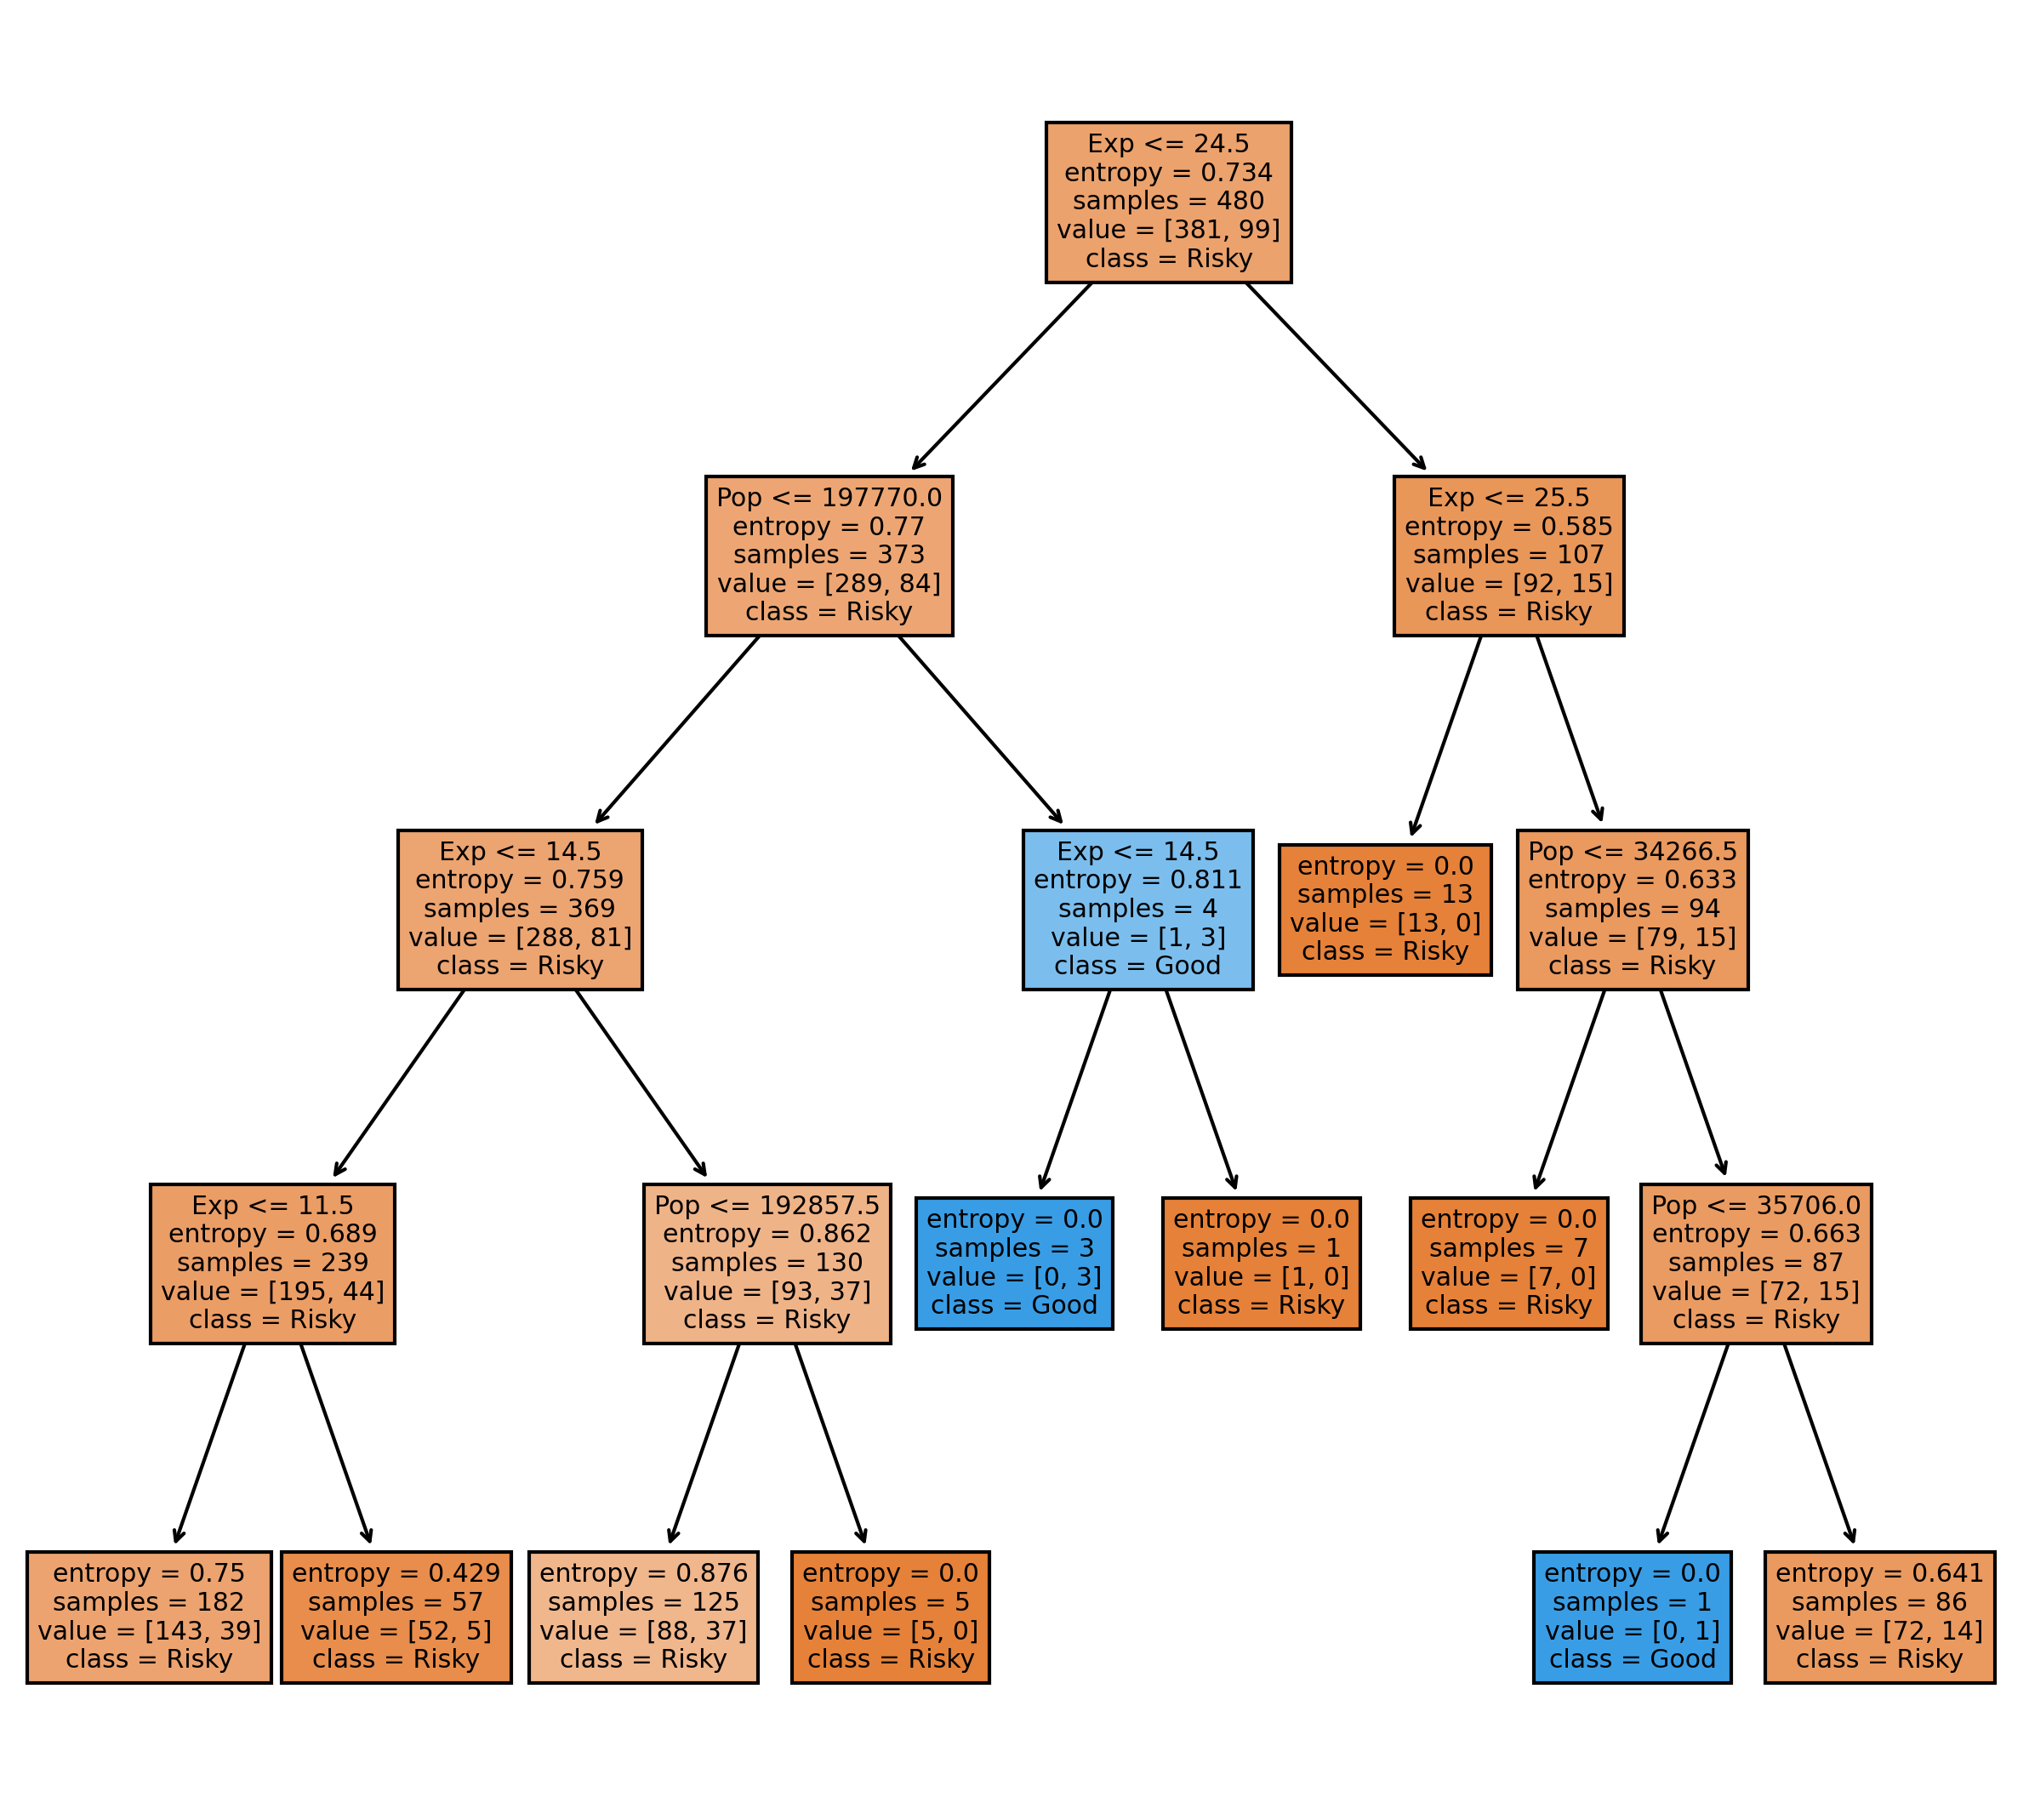

In [38]:
fn=['Marital_S','Pop', 'Exp', 'Undergrad_YES', 'Urban_YES']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,9), dpi=300)
tree.plot_tree(clf_en,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

## Predicting the Test set results with criterion entropy

In [39]:
#Predicting on test data
y_pred_en = clf_en.predict(x_test)
y_pred_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Checking accuracy score with criterion entropy

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7833


## Comparing the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [41]:
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8021


## Checking overfitting and underfitting

In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.8021
Test set score: 0.7833


We can see that the training-set score and test-set score has small gap.The training-set accuracy score is 0.8021 while the test-set accuracy to be 0.7833. These two values are quite comparable. So, there is no sign of overfitting.

In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[94  1]
 [25  0]]


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

## Building Decision Tree Classifier (CART) using Gini Criteria

In [46]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini
clf_gi=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=5)

In [47]:
#fitting the model
clf_gi.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

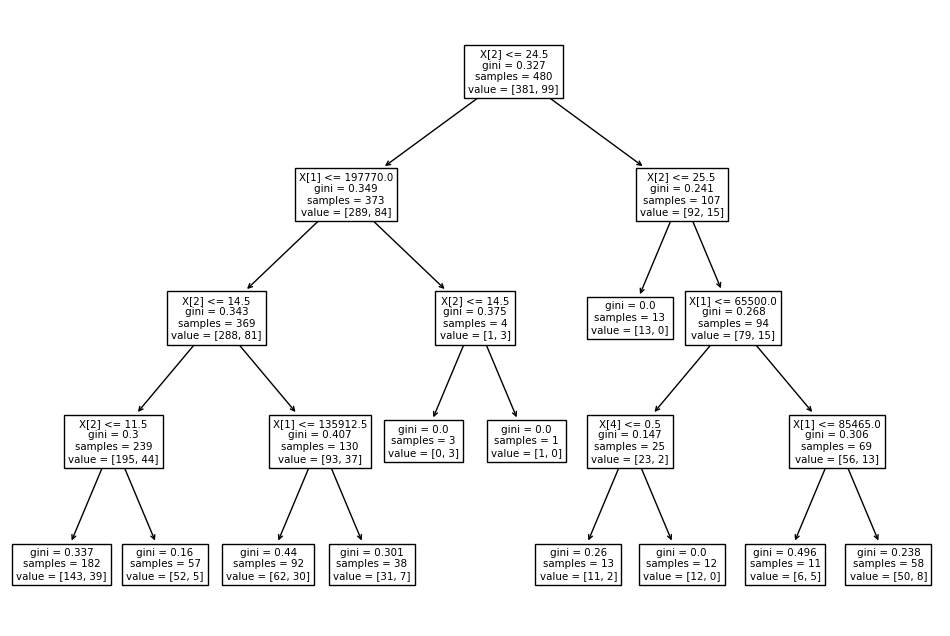

In [48]:
#PLotting the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gi)
plt.show()

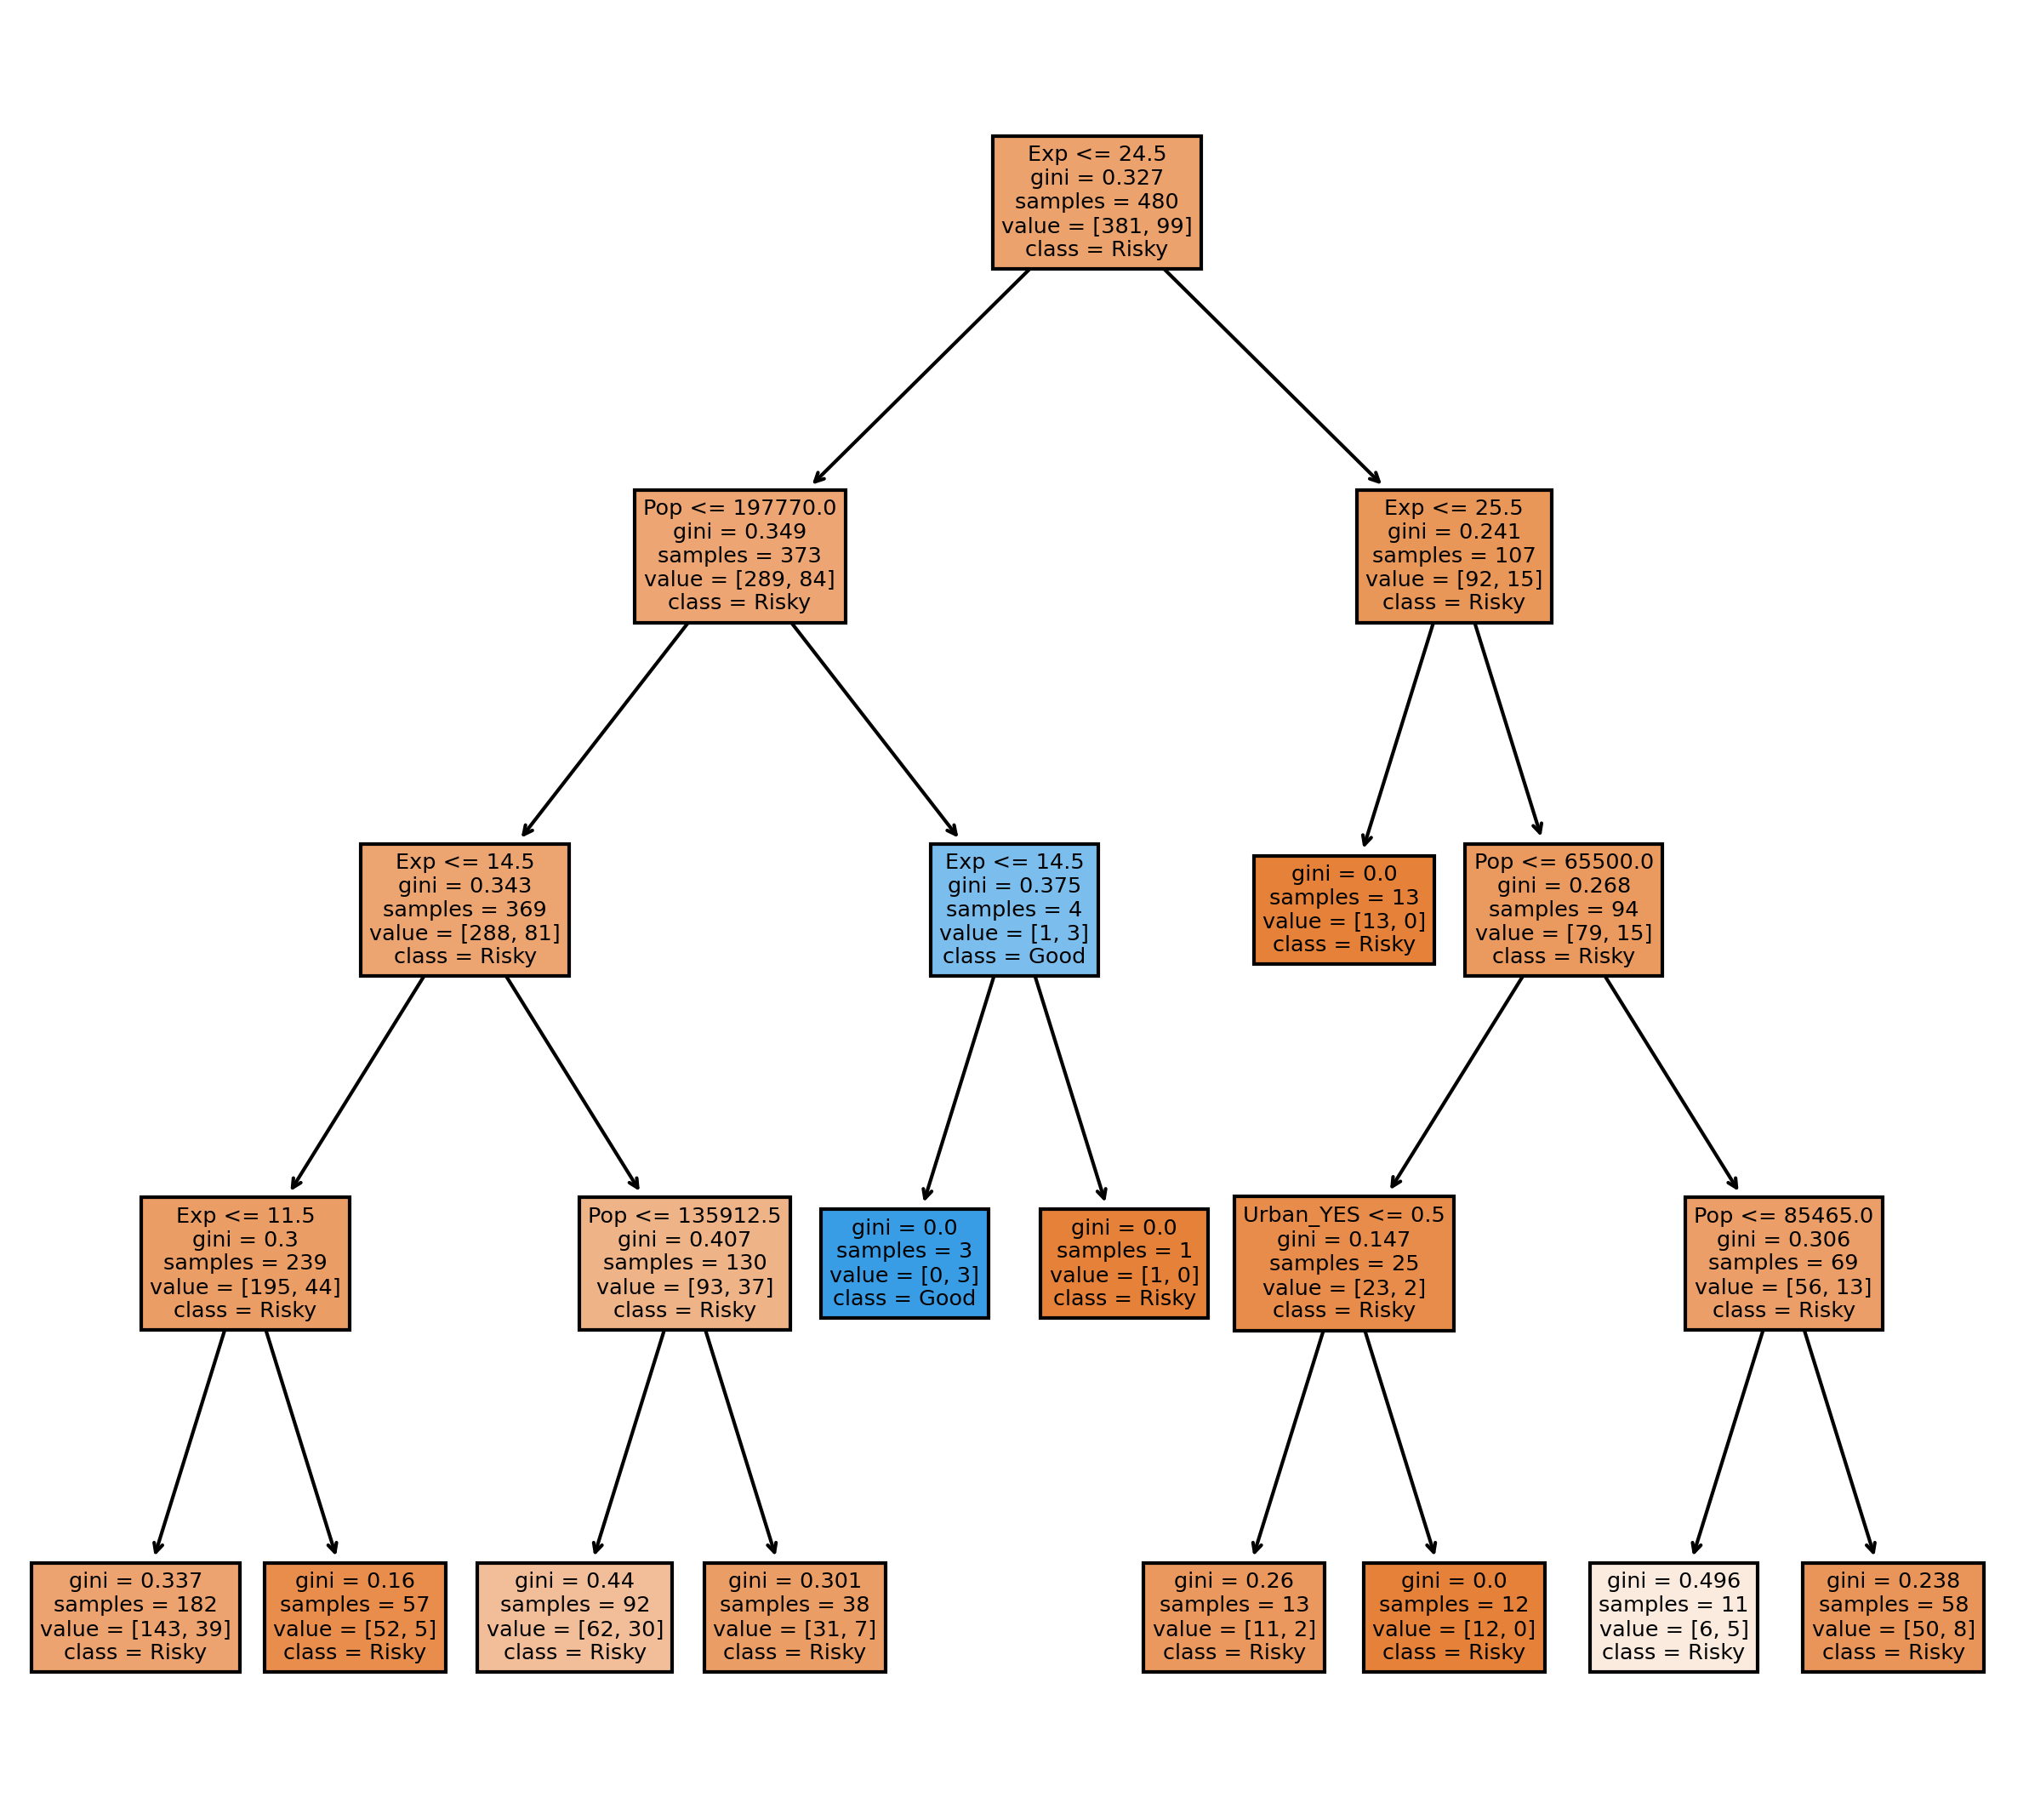

In [49]:
fn=['Marital_S','Pop', 'Exp', 'Undergrad_YES', 'Urban_YES']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,9), dpi=300)
tree.plot_tree(clf_gi,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

## Predicting the Test set results with criterion gini

In [50]:
#Predicting on test data
y_pred_gi = clf_gi.predict(x_test)
y_pred_gi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Checking accuracy score with criterion gini

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gi)))

Model accuracy score with criterion gini: 0.7833


## Comparing the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [52]:
y_pred_train_gi = clf_gi.predict(x_train)
y_pred_train_gi

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gi)))

Training-set accuracy score: 0.8000


## Checking overfitting and underfitting

In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gi.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gi.score(x_test, y_test)))

Training set score: 0.8000
Test set score: 0.7833


We can see that the training-set score and test-set score has small gap.The training-set accuracy score is 0.8000 while the test-set accuracy to be 0.7833. These two values are quite comparable. So, there is no sign of overfitting.

In [55]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gi)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[94  1]
 [25  0]]


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gi))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



## Decision Tree using Regression Example

In [57]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [58]:
X1 =data.drop(['Tax_Inc'],axis=1) #feature vectors
Y1 =data['Tax_Inc']  #target variable

In [59]:
X1.head()

,Marital_S,Pop,Exp,Undergrad_YES,Urban_YES
0,1,50047,10,0,1
1,3,134075,18,1,1
2,2,160205,30,0,1
3,1,193264,15,1,1
4,2,27533,28,0,0


In [60]:
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Inc, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.28, random_state=1)

In [95]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 100)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [97]:

model.fit(X_train_res, y_train_res.ravel())
predictions = model.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       133
           1       0.22      0.36      0.28        36

    accuracy                           0.60       169
   macro avg       0.51      0.51      0.50       169
weighted avg       0.67      0.60      0.63       169



## Insights 


1. In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.69 and 0.72.
2. In the model with criterion `gini index`, the training-set accuracy score is 0.8000 while the test-set accuracy to be 0.7833. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.8021 while the test-set accuracy to be 0.7833.So, there is no sign of overfitting.
4. The <b>'Experience'</b> defined as root node using gini impurty and entropy.
5.	The confusion matrix and classification report yields very good model performance.
6. The model with criterion `entropy` gives more accuracy rather than criterion `gini index`.
7. So, model with criterion `entropy` is Generalized(Best fitted).